In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# percentage

In [5]:
# PATH = '../bmat_info_tsv/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.tsv'
PATH = '../bmat_info_tsv/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.tsv'


df = pd.read_csv(PATH, sep='\t')
df.head()

,chr,AC,GT,mutation_all,AG,CA,CG,GC,AT,GA,TG,CT,TC,TA
0,chr1,329348,1550430,19996104,1125182,1546267,305861,311039,472701,6217468,328843,6214560,1123609,470796
1,chr2,239471,1137017,14828634,824476,1137736,222454,225830,339835,4656717,238045,4645179,820220,341654
2,chr3,217523,1041121,13595243,752251,1038888,200954,200468,318878,4268734,217343,4265810,758083,315190
3,chr4,179781,803144,10618450,623920,802903,168096,166653,271340,3261156,183534,3267041,625449,265433
4,chr5,186226,859031,11242404,627221,863948,166628,165490,271316,3506307,191449,3513584,626471,264733


In [6]:
ls_base = 'AGCT'
df_fbase2tbase = pd.DataFrame(np.zeros((4,4)), columns = [i for i in ls_base])
df_fbase2tbase.index = [i for i in ls_base[::-1]]
df_fbase2tbase

ls_df_chroms = []

for chroms in ['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]:
    df_this_chr = df.loc[df.chr==chroms,:]
    df_base = df_fbase2tbase.copy()

    for i in ls_base:
        for j in ls_base:
            if i!=j:
                df_base.loc[i,j] = df_this_chr.loc[:,i+j].values[0]/df_this_chr['mutation_all'].values[0] * 100
    ls_df_chroms.append([chroms,df_base])
dict_chroms_info = {}
for chroms in ['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]:
    for index,chroms_check in enumerate(ls_df_chroms):
        if chroms_check[0] == chroms:
            dict_chroms_info[chroms] = ls_df_chroms[index][1].values.tolist()
dict_chroms_info

{'chr1': [[2.3544386446479773, 1.6445353554872488, 5.619139608395716, 0.0],
  [7.732841357496441, 1.529602966657905, 0.0, 31.07885416079052],
  [31.09339699373438, 0.0, 1.5554980110125451, 7.753660413048462],
  [0.0, 5.627006140796227, 1.647060847453084, 2.3639655004794933]],
 'chr2': [[2.3040153260239613, 1.6053063282835087, 5.5313254073166815, 0.0],
  [7.672561073393544, 1.5001651534456917, 0.0, 31.32573775844761],
  [31.403546678675866, 0.0, 1.5229319167227406, 7.667712346261969],
  [0.0, 5.560026634955047, 1.6149228580326414, 2.291748518440741]],
 'chr3': [[2.3183844525618262, 1.598669475786494, 5.576090107400066, 0.0],
  [7.641555211628067, 1.4781199571055847, 0.0, 31.377225107340855],
  [31.39873263022956, 0.0, 1.4745451773094456, 7.657980074353948],
  [0.0, 5.533192749846398, 1.5999934683035824, 2.345511588134173]],
 'chr4': [[2.499733953637301, 1.7284443586399145, 5.8902099647311985, 0.0],
  [7.561395495576097, 1.583055907406448, 0.0, 30.767588489845505],
  [30.712166088270887,

0 chr1 0 0
1 chr2 1 0
2 chr3 2 0
3 chr4 3 0
4 chr5 4 0
5 chr6 0 1
6 chr7 1 1
7 chr8 2 1
8 chr9 3 1
9 chr10 4 1
10 chr11 0 2
11 chr12 1 2
12 chr13 2 2
13 chr14 3 2
14 chr15 4 2
15 chr16 0 3
16 chr17 1 3
17 chr18 2 3
18 chr19 3 3
19 chr20 4 3
20 chr21 0 4
21 chr22 1 4
22 chrX 2 4
23 chrY 3 4
24 chrM 4 4


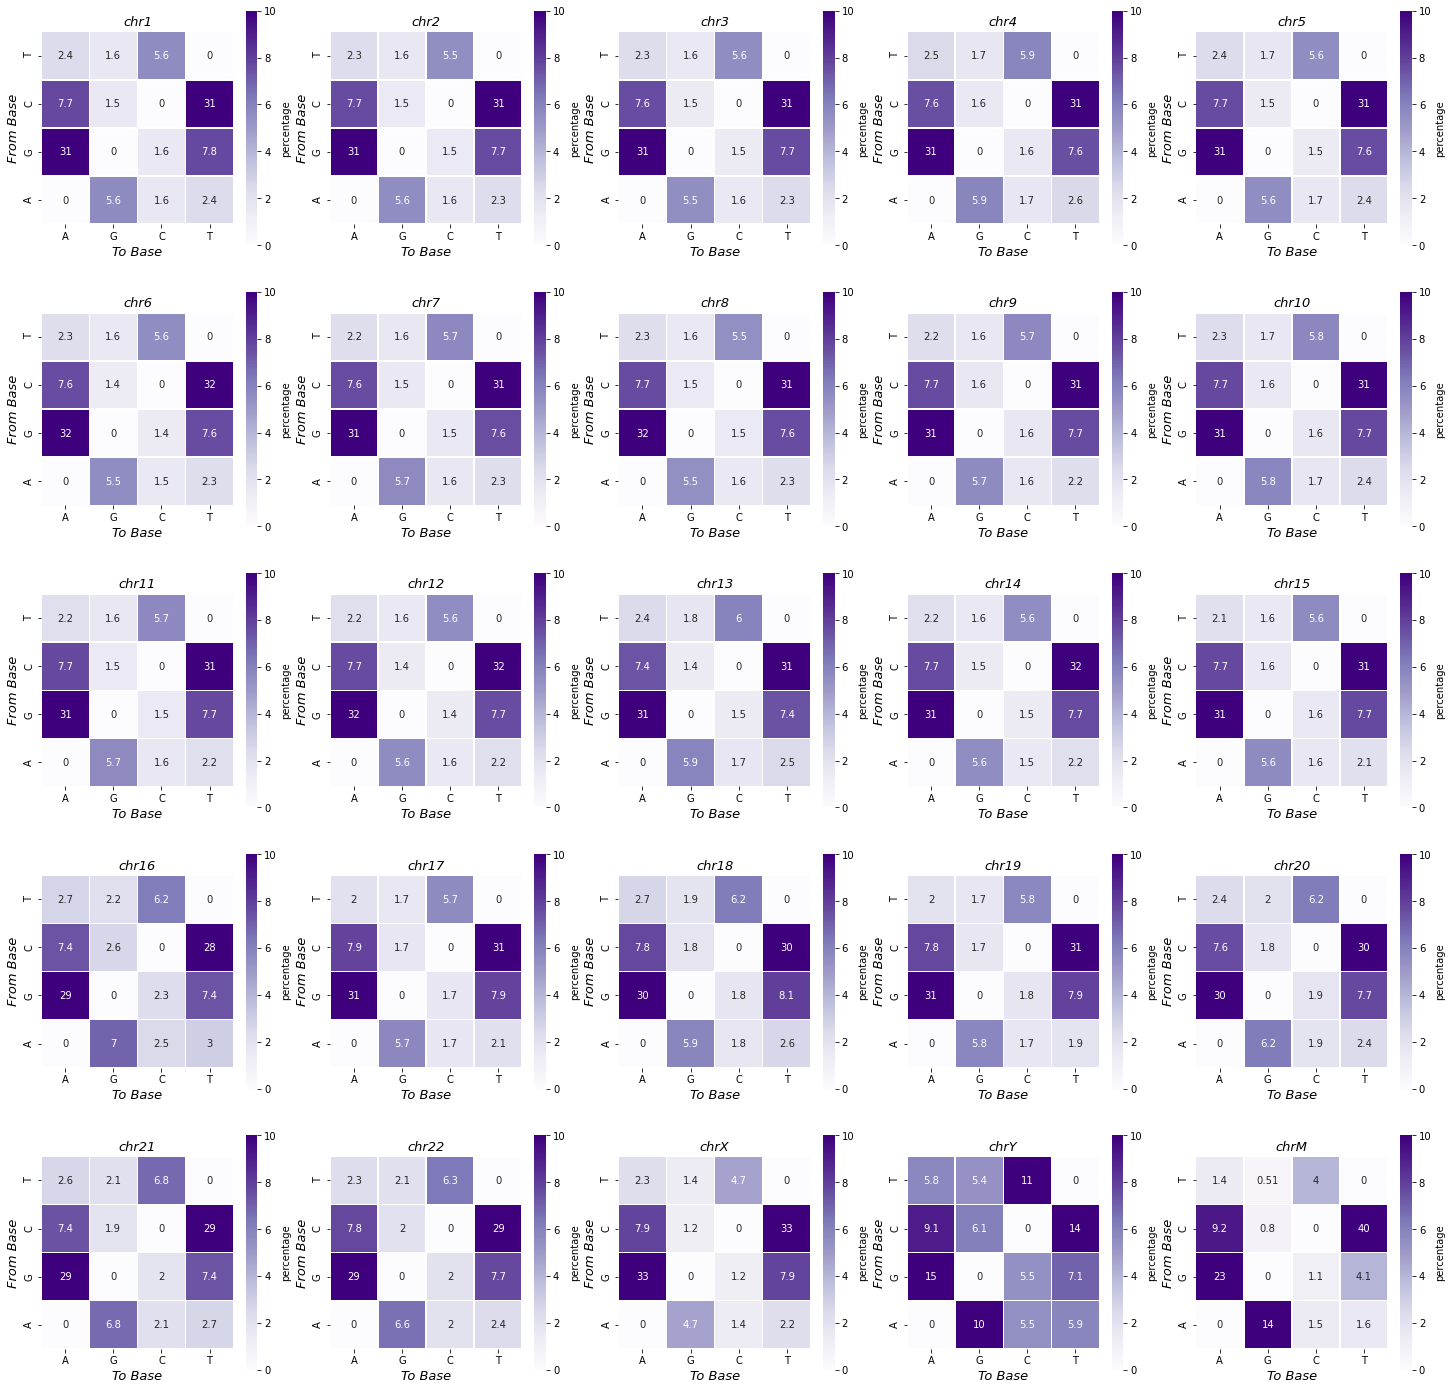

In [7]:
fig,ax = plt.subplots(5,5,figsize=(5*5,5*5))

for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    # plot
    data = pd.DataFrame(dict_chroms_info[chroms])
    data.index = df_fbase2tbase.index.values
    data.columns = df_fbase2tbase.columns.values
    
    print(index,chroms,index%5,int(index/5))
    row = int(index/5)
    col = index%5
    sns.heatmap(
                data, 
                vmin = 0,
                vmax = 10,
                linewidths = 0.5,
                square = True,
                annot= dict_chroms_info[chroms],
        #         annot= True,
    #             fmt = "d",
                ax = ax[row,col],
                cmap = 'Purples',
                cbar_kws={"orientation":"vertical","label": "percentage"}
            )
    ax[row,col].set_xlabel('To Base', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_ylabel('From Base', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_title(chroms,fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
# data
plt.savefig(PATH+'.pdf')

# count

In [87]:
import json
cmd = 'samtools idxstats ../bam/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_bwa_hg38_sort_rmdup_MAPQ20.bam'
cmd_return1 = os.popen(cmd).read()
cmd = 'samtools idxstats ../bam/293T-bat_GBEmini-dU-RNF2-All-PD_rep1_bwa_hg38_sort_rmdup_MAPQ20.bam'
cmd_return2 = os.popen(cmd).read()


ls_cmd1 = [i.split('\t') for i in cmd_return1.split('\n')][:-2]
ls_cmd2 = [i.split('\t') for i in cmd_return2.split('\n')][:-2]
ls_AP_chr_length = [int(i[1]) for i in ls_cmd1]
ls_dU_chr_length = [int(i[1]) for i in ls_cmd2]
ls_AP_reads_count = [int(i[2]) for i in ls_cmd1]
ls_dU_reads_count = [int(i[2]) for i in ls_cmd2]

# check raw counts per chr

In [88]:
for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    print(chroms,ls_AP_reads_count[index],ls_dU_reads_count[index],'FC: ',ls_AP_reads_count[index]/ls_dU_reads_count[index])

chr1 27939307 10874645 FC:  2.5692155468063556
chr2 21130670 8459291 FC:  2.497924471448021
chr3 19392992 7857370 FC:  2.4681276304921367
chr4 14762761 6217494 FC:  2.3743908719493736
chr5 16008266 6481701 FC:  2.469763106937515
chr6 17436692 7065430 FC:  2.4678882955460604
chr7 14695504 5851696 FC:  2.5113238965250417
chr8 11620620 4668989 FC:  2.4888942766838817
chr9 10165781 3974023 FC:  2.558057917631579
chr10 12723640 4928666 FC:  2.5815585799484078
chr11 11924044 4628031 FC:  2.5764831739458964
chr12 11903478 4702697 FC:  2.5312024142741922
chr13 10804007 4658439 FC:  2.319233331165225
chr14 8011318 3169196 FC:  2.5278707912038256
chr15 7311165 2789080 FC:  2.621353636324523
chr16 7743046 2814864 FC:  2.750770907582036
chr17 7216793 2649986 FC:  2.7233325006245317
chr18 6140589 2474772 FC:  2.4812746386333773
chr19 4947561 1739966 FC:  2.843481424349671
chr20 5934454 2188460 FC:  2.7117032068212352
chr21 4176968 1683235 FC:  2.481512088329912
chr22 4412467 1560019 FC:  2.82847003

In [97]:
PATH = '../bmat_info_tsv/293T-bat_GBEmini-dU-RNF2-All-PD_rep1_hg38.MAPQ20.tsv.bak'
df_dU = pd.read_csv(PATH,sep='\t')
PATH = '../bmat_info_tsv/293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.tsv.bak'
df_AP = pd.read_csv(PATH,sep='\t')
df_dU = df_dU.set_index('chr')
df_AP = df_AP.set_index('chr')
df_dU['reads_count'] = ls_dU_reads_count
df_dU['chr_length'] = ls_dU_chr_length
df_AP['reads_count'] = ls_AP_reads_count
df_AP['chr_length'] = ls_AP_chr_length
df_AP_ori = df_AP
for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    # raw
#     df_dU.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']] = df_dU.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']]
    # norm
    df_dU.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']] = df_dU.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']].map(lambda x: x/df_dU.loc[chroms,'reads_count']*df_dU.loc[chroms,'chr_length'])
df_dU_nor = df_dU.copy()

for index,chroms in enumerate(['chr'+str(i) for i in (list(range(1,23)) + ['X','Y','M'])]):
    # raw
#     df_AP.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']] = df_AP.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']]
    # norm
    df_AP.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']] = df_AP.loc[chroms,['AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']].map(lambda x: x/df_AP.loc[chroms,'reads_count']*df_AP.loc[chroms,'chr_length'])
df_AP_nor = df_AP.copy()

In [98]:
df_dU_nor['Sample'] = 'dU'
df_AP_nor['Sample'] = 'AP'
df_merge_nor = pd.concat([df_dU_nor,df_AP_nor],axis=0)
df_merge_nor.reset_index(inplace=True)
df_merge_nor = df_merge_nor[['Sample','chr','AC', 'AG', 'AT', 'CA', 'CG', 'CT', 'GA', 'GC', 'GT', 'TA', 'TC', 'TG', 'mutation_all']]
df_merge_nor.sort_values(['chr','Sample'],inplace=True)
df_merge_nor.reset_index(inplace=True)
df_merge_nor.drop('index',axis=1,inplace=True)
df_former = df_merge_nor[['Sample','chr']]
df_later = df_merge_nor.iloc[:,2:]
rep = len(df_later.values[0])
ls_b2b = df_later.columns
ls_all = []
for index, line in enumerate(df_former.values.tolist()):
    ls_temp = []
    info = df_later.values.tolist()[index]
    for i in range(rep):
        ls_temp.append(line + [ls_b2b[i]] + [info[i]])
    ls_all.extend(ls_temp)
# ls_all

In [99]:
df_final = pd.DataFrame(ls_all,columns=['Sample','Chr','Mutation','NormCounts'])
df_final.Mutation = df_final.Mutation.map(lambda x: 'ALL' if x=='mutation_all' else x)
df_final

,Sample,Chr,Mutation,NormCounts
0,AP,chr1,AC,2.934693e+06
1,AP,chr1,AG,1.002606e+07
2,AP,chr1,AT,4.212057e+06
3,AP,chr1,CA,1.377819e+07
4,AP,chr1,CG,2.725410e+06
...,...,...,...,...
645,dU,chrY,GT,2.264383e+07
646,dU,chrY,TA,1.828510e+07
647,dU,chrY,TC,3.467709e+07
648,dU,chrY,TG,1.694871e+07


In [100]:
# check data
df_final[(df_final.Chr=='chrY') & (df_final.Sample=='AP') & (df_final.Mutation!='ALL')]['NormCounts'].sum()

347101035.11696047

In [101]:
df_final[(df_final.Chr=='chrY') & (df_final.Sample=='AP') & (df_final.Mutation=='ALL')]

,Sample,Chr,Mutation,NormCounts
636,AP,chrY,ALL,3.471010e+08


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
sns.set(style="whitegrid")
# g = sns.barplot(df_final)

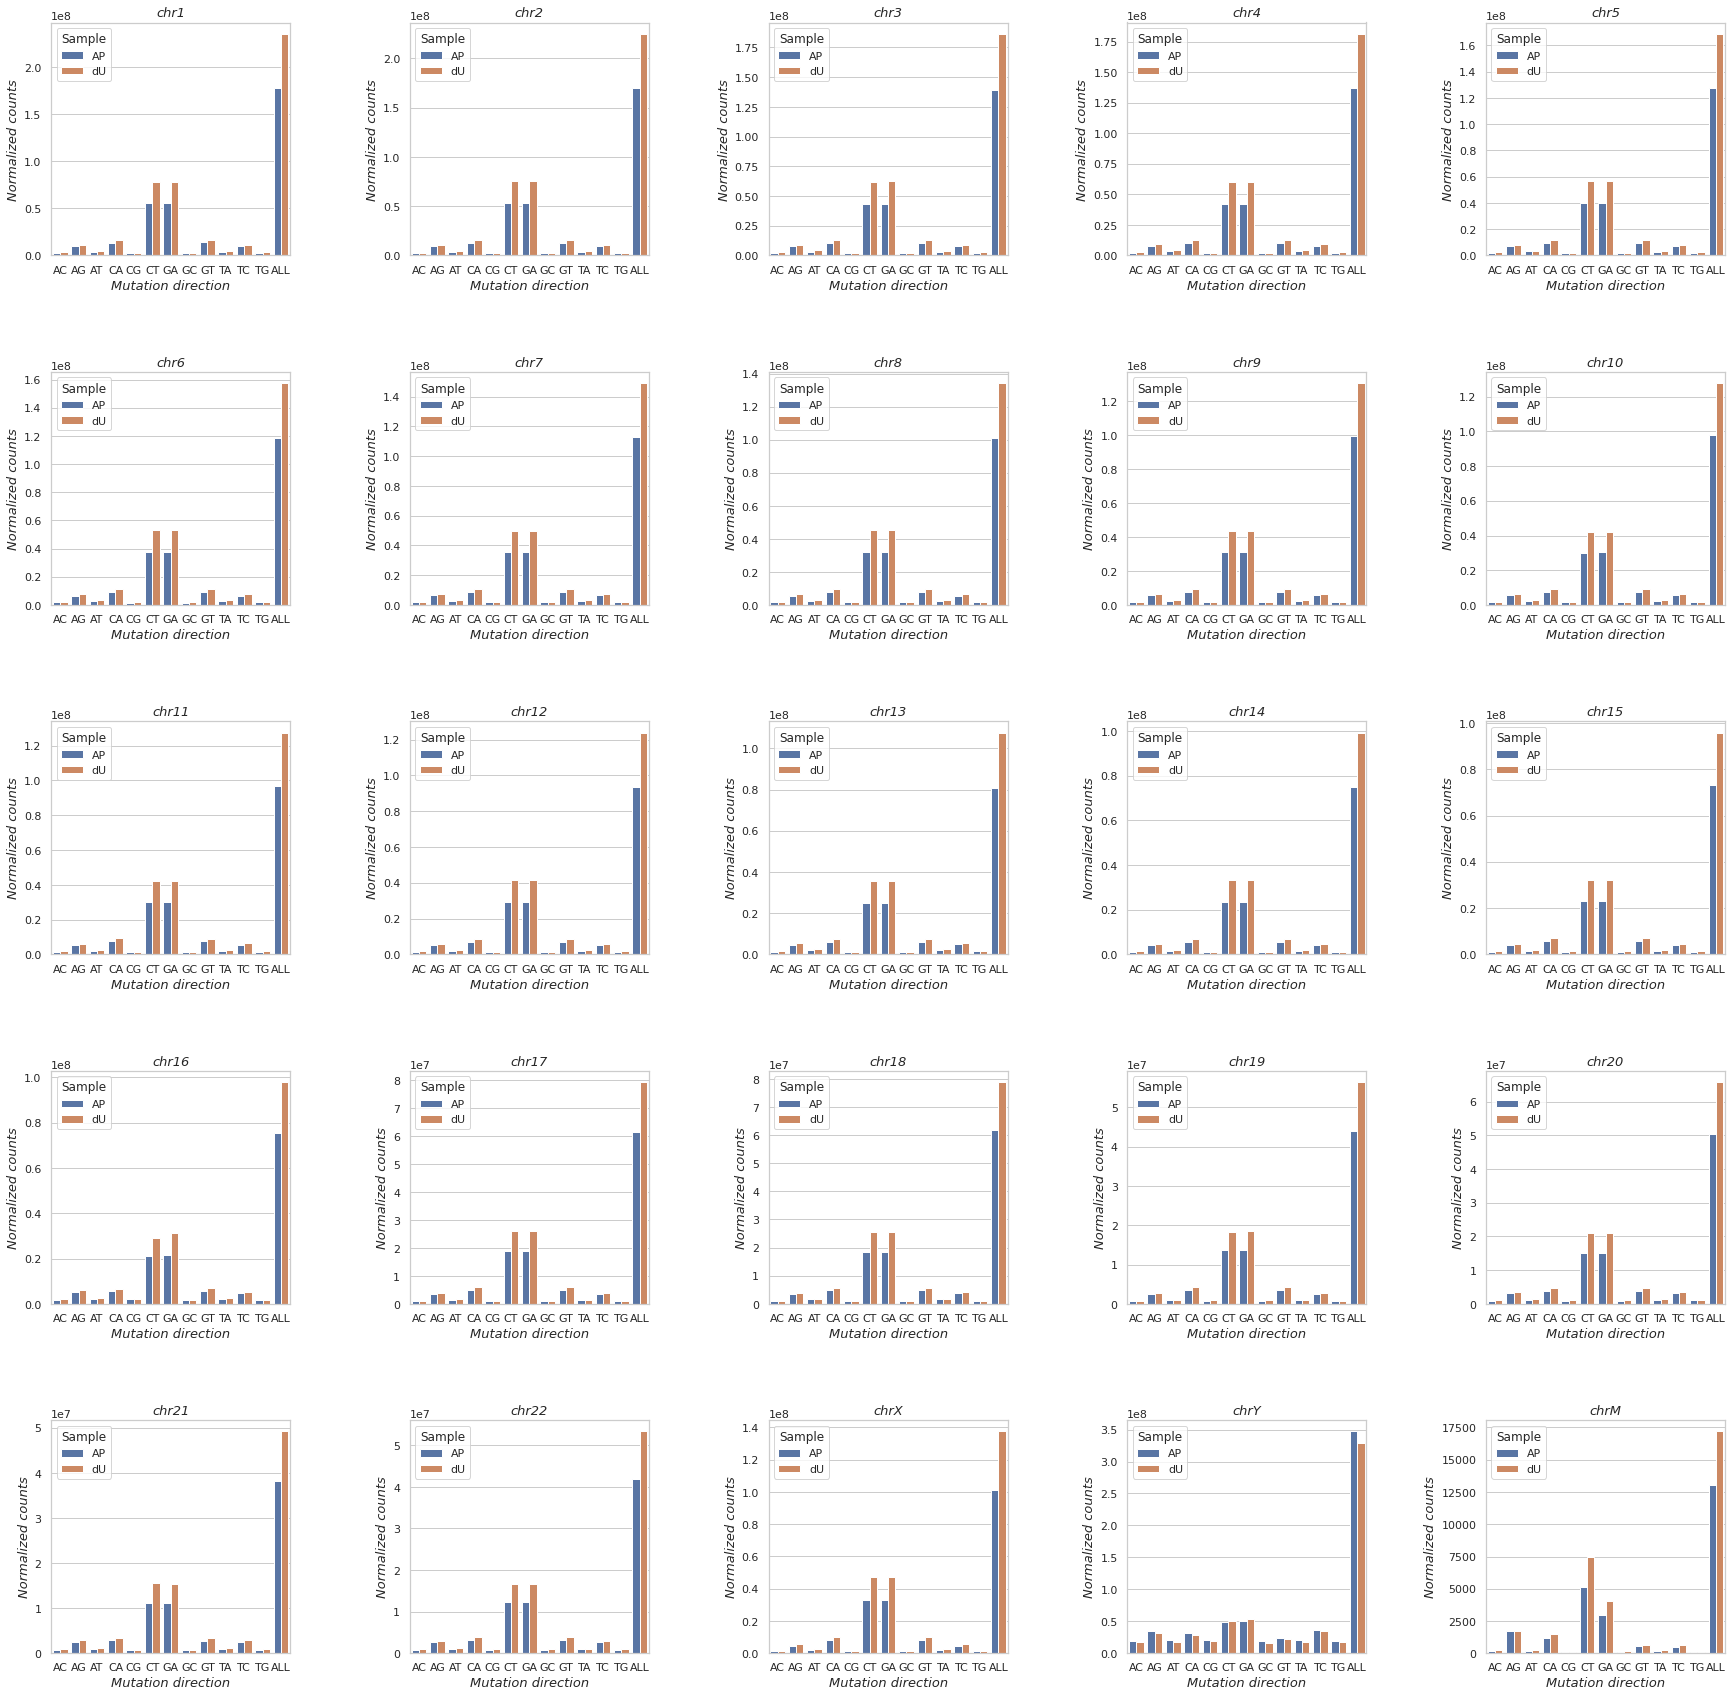

In [104]:
fig,ax = plt.subplots(5,5,figsize=(6*5,6*5))

for index,chroms in enumerate([str(i) for i in range(1,23)] + ['X','Y','M']):
    row = int(index/5)
    col = index%5
    Chr_name = 'chr%s' % chroms
    # fig
    sns.barplot(
        x = 'Mutation',
        y = 'NormCounts',
        hue = 'Sample',
        data=df_final[df_final.Chr == Chr_name],
        ci=None,
        ax = ax[row,col]
    )
    ax[row,col].set_xlabel('Mutation direction', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_ylabel('Normalized counts', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
#     ax[row,col].set_ylabel('Raw counts', fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
    ax[row,col].set_title(Chr_name,fontsize=13,fontfamily = 'sans-serif',fontstyle='italic')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
plt.savefig('./20201112-MutationCountsPerChr——293T-bat_GBEmini-dU-RNF2-All-PD_rep1_AND_293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.pdf')
# plt.savefig('./20201112-RawCountsPerChr——293T-bat_GBEmini-dU-RNF2-All-PD_rep1_AND_293T-bat_GBEmini-AP-RNF2-All-PD_rep1_hg38.MAPQ20.pdf')